### Preliminaries

Import all necessary packages

In [132]:
using PastaQ
using ITensors
using Plots
using StatsBase, Distributions
using LaTeXStrings

Call run_random_circuit.jl for simulating quantum circuits

In [2]:
include("run_random_circuit.jl")

run (generic function with 1 method)

Call proj_measurement.jl for performing projective menasurement. The measurement basis will be  performed in the $\sigma_z$ basis.

In [79]:
include("proj_measurement.jl")

get_probabilities (generic function with 1 method)

Check whether the code works properly with a depth-2 quantum circuit with 2 qubits.

In [80]:
N = 2 # The number of Qubit
D = 2 # Depth of Circuit
shots = 1024 # The number of shot

ϕ = run(N,D) # Get state
qc_result = execute(ϕ,N,shots,"Z") # Get decimal representation of shot result(Vector)
Prob = get_probabilities(N,qc_result) # Get probabilities from Count

OrderedCollections.OrderedDict{Int64, Float64} with 4 entries:
  0 => 0.0292969
  1 => 0.126953
  2 => 0.599609
  3 => 0.244141

### Main part of the solution

We'd like to generate the probability distribution (of the projective measurement outcomes) from quantum circuits with varying circuit depth while the number of qubits is fixed. Without loss of generality, we will set the number of qubits to be 8 in this problem.

In [81]:
# Create a function that stores probabilities as a vector (by extracting it frmo the dictionary).
function prob_vector(P)
    p = zeros(2^N)
    for i in 0:2^N-1
        p[i+1] = P[i]
    end
    return p
end

prob_vector (generic function with 1 method)

To demonstrate how the cumulative distribution converges to $1-\exp(-2^N p)$ as we increase the quantum circuit depth, we calculate the cdf for quantum circuits with depth = 1, 2, 5, 10, 50, 100.

In [117]:
# Number of qubits is 8
N = 8
# Fix the number of shots to be 8192 (just to make sure that we have reasonably good measurement statistics)
shots = 8192

# Circuit depth = 1
ψ1 = run(N,1) # Get state
qc1 = execute(ψ1,N,shots,"Z") # Get decimal representation of shot result(Vector)
Prob1 = get_probabilities(N,qc1) # Get probabilities from Count

# Circuit depth = 2
ψ2 = run(N,2) # Get state
qc2 = execute(ψ2,N,shots,"Z") # Get decimal representation of shot result(Vector)
Prob2 = get_probabilities(N,qc2) # Get probabilities from Count

# Circuit depth = 5
ψ5 = run(N,5) # Get state
qc5 = execute(ψ5,N,shots,"Z"); # Get decimal representation of shot result(Vector)
Prob5 = get_probabilities(N,qc5); # Get probabilities from Count

# Circuit depth = 10
ψ10 = run(N,10) # Get state
qc10 = execute(ψ10,N,shots,"Z") # Get decimal representation of shot result(Vector)
Prob10 = get_probabilities(N,qc10) # Get probabilities from Count

# Circuit depth = 50
ψ50 = run(N,50) # Get state
qc50 = execute(ψ50,N,shots,"Z") # Get decimal representation of shot result(Vector)
Prob50 = get_probabilities(N,qc50) # Get probabilities from Count

# Circuit depth = 100
ψ100 = run(N,100) # Get state
qc100 = execute(ψ100,N,shots,"Z") # Get decimal representation of shot result(Vector)
Prob100 = get_probabilities(N,qc100) # Get probabilities from Count

OrderedCollections.OrderedDict{Int64, Float64} with 256 entries:
  0  => 0.00646973
  1  => 0.000366211
  2  => 0.00366211
  3  => 0.00292969
  4  => 0.0107422
  5  => 0.00158691
  6  => 0.000976562
  7  => 0.000488281
  8  => 0.00012207
  9  => 0.00317383
  10 => 0.00549316
  11 => 0.000976562
  12 => 0.00109863
  13 => 0.0150146
  14 => 0.0078125
  15 => 0.0
  16 => 0.000976562
  17 => 0.00219727
  18 => 0.00146484
  19 => 0.00537109
  20 => 0.000732422
  21 => 0.00927734
  22 => 0.00561523
  23 => 0.00524902
  24 => 0.0150146
  ⋮  => ⋮

Convert probability dictionaries to vectors for cdf calculation and plotting.

In [119]:
p1 = prob_vector(Prob1);
p2 = prob_vector(Prob2);
p5 = prob_vector(Prob5);
p10 = prob_vector(Prob10);
p50 = prob_vector(Prob50);
p100 = prob_vector(Prob100);

Calculate the cdfs

In [120]:
gcdf1 = ecdf(p1);
gcdf2 = ecdf(p2);
gcdf5 = ecdf(p5);
gcdf10 = ecdf(p10);
gcdf50 = ecdf(p50);
gcdf100 = ecdf(p100);

Now plot the results to see the convergence as expected.

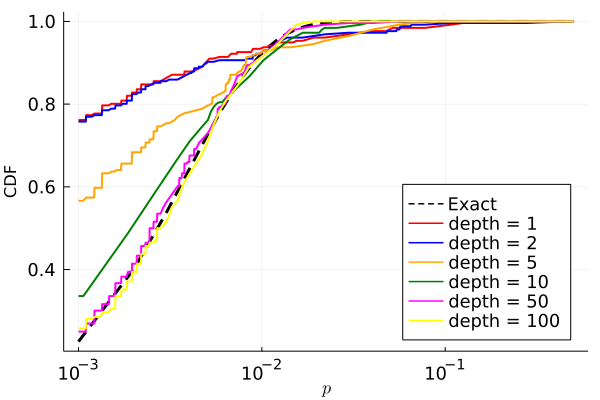

In [149]:
xi = 0.001
xf = 0.5
x = xi:xi:xf
# First, plot the ideal cdf
ideal = 1 .- exp.(-2^N .* x);
plot(x,ideal,xaxis=:log,lw = 3,xlabel = L"p",ylabel = "CDF",label = "Exact",linestyle = :dash,linecolor = :black,
    legend=:bottomright,legendfont=font(12),xtickfont=font(12),ytickfont=font(12),xguidefont=font(12))

# CDF for circuit depth = 1
plot!(p1->gcdf1(p1),xi,xf,xaxis=:log,lw = 2,label = "depth = 1",linecolor = :red)

# CDF for circuit depth = 1
plot!(p2->gcdf2(p2),xi,xf,xaxis=:log,lw = 2,label = "depth = 2",linecolor = :blue)

# CDF for circuit depth = 1
plot!(p5->gcdf5(p5),xi,xf,xaxis=:log,lw = 2,label = "depth = 5",linecolor = :orange)

# CDF for circuit depth = 1
plot!(p10->gcdf10(p10),xi,xf,xaxis=:log,lw = 2,label = "depth = 10",linecolor = :green)

# CDF for circuit depth = 1
plot!(p50->gcdf50(p50),xi,xf,xaxis=:log,lw = 2,label = "depth = 50",linecolor = :magenta)

# CDF for circuit depth = 1
plot!(p100->gcdf100(p100),xi,xf,xaxis=:log,lw = 2,label = "depth = 100",linecolor = :yellow)

The figure above clearly demonstrates that the cdf approaches to the exact one as the quantum circuit depth is increased as expected.

In [150]:
# Save figure
savefig("task3_result.pdf")